#Clustering
In this notebook, we conducted a comprehensive analysis using clustering methodologies of a medical dataset aimed at developing a question-answering model. Our analysis involved utilizing preprocessed data and conducting clustering and visualization techniques to gain insights into the structure and content of the dataset.



*   **Data Exploration and Preprocessing:**
We began by exploring the dataset's characteristics, including word counts, vocabulary richness, and distribution of words. Preprocessing steps such as removing punctuation, stopwords, and lemmatization were applied to standardize the text and improve model performance.
*   **Visualization and Analysis:**
We visualized the dataset using techniques like WordClouds, N-grams, and TF-IDF analysis to uncover common phrases, patterns, and significant terms. This allowed us to gain a deeper understanding of the dataset's content and identify prevalent medical themes.

# Import and install

In [1]:
TEST_MODEL = True

In [2]:
if TEST_MODEL:
  !git clone https://github.com/epfml/sent2vec.git
  %cd sent2vec
  !make
  !pip install .
  import sent2vec

Cloning into 'sent2vec'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 425 (delta 9), reused 4 (delta 1), pack-reused 403
Receiving objects: 100% (425/425), 447.46 KiB | 6.39 MiB/s, done.
Resolving deltas: 100% (261/261), done.
/content/sent2vec
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/args.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/dictionary.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/productquantizer.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/shmem_matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/qmatrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/vector.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/model.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/utils.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/fasttext.cc
c++ -pthread -std=c++0x -O3 -f

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00


In [4]:
import string
from datasets import load_dataset
import re
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
from gensim.models import Word2Vec
from google.colab import drive
import os
import csv
import numpy as np
import random
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
import time
from sklearn import metrics
from sklearn.cluster import KMeans
import time
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

path = 'Colab Notebooks/NLP'

os.chdir(f'/content/drive/MyDrive/{path}')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/NLP'

In [7]:
DATAS_PATH = '/content/drive/MyDrive/Colab Notebooks/NLP/project/Models/Datasets'

#Dataset import

In [10]:
# For the clustering module we have used the pre-processed dataset from our preliminary analysis which has all the details such as
# input and output length, vocabulary and lemmatization
file_dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/NLP Project/Datasets/pre_preprocessed_dataset.csv')
print(type(file_dataframe))

<class 'pandas.core.frame.DataFrame'>


In [11]:
# The below is out preprocessed dataframe

file_dataframe.head()

input  \
0  What is the relationship between very low Mg2+...   
1  What leads to genitourinary syndrome of menopa...   
2  What does low REM sleep latency and experienci...   
3  What are some possible causes of low PTH and h...   
4  How does the level of anti-müllerian hormone r...   

                                              output  input length  \
0  Very low Mg2+ levels correspond to low PTH lev...            14   
1  Low estradiol production leads to genitourinar...             9   
2  Low REM sleep latency and experiencing halluci...            11   
3  PTH-independent hypercalcemia, which can be ca...            12   
4  The level of anti-müllerian hormone is directl...            11   

   output length                                   input vocabolary  \
0             17  ['relationship', 'low', 'mg2', 'levels', 'pth'...   
1             11  ['leads', 'genitourinary', 'syndrome', 'menopa...   
2             10  ['low', 'rem', 'sleep', 'latency', 'experienci...   
3             14  ['possible', 'causes', 'low', 'pth', 'high', '...   
4             20  ['level', 'antimüllerian', 'hormone', 'relate'...   

                                   output vocabolary  \
0  ['low', 'mg2', 'levels', 'correspond', 'low', ...   
1  ['low', 'estradiol', 'production', 'leads', 'g...   
2  ['low', 'rem', 'sleep', 'latency', 'experienci...   
3  ['pthindependent', 'hypercalcemia', 'caused', ...   
4  ['level', 'antimüllerian', 'hormone', 'directl...   

                                    lemmatized input  \
0  ['ca2', 'level', 'low', 'mg2', 'pth', 'relatio...   
1  ['atrophic', 'genitourinary', 'lead', 'menopau...   
2  ['experiencing', 'hallucinationssleep', 'laten...   
3  ['calcium', 'cause', 'high', 'level', 'low', '...   
4  ['antimüllerian', 'hormone', 'level', 'ovarian...   

                                   lemmatized output  
0  ['ca2', 'correspond', 'level', 'low', 'mg2', '...  
1  ['atrophic', 'estradiol', 'genitourinary', 'le...  
2  ['experiencing', 'hallucinationssleep', 'laten...  
3  ['cancer', 'caused', 'disease', 'granulomatous...  
4  ['', 'antimüllerian', 'directly', 'hormone', '...

In [12]:
input, output = file_dataframe["input"], file_dataframe["output"]

In [13]:
documents = input + " " + output

# Documents vectorisation

In order to cluster the documents, we need to first convert them into a vector format. We will use the `TfidfVectorizer` from Scikit-Learn to do this.

The `TfidfVectorizer` is very similar to the `CountVectorizer` we used in the text classification tutorial except that it multiplies the term frequency in the document by the inverse document frequecy of the term across the corpus: $\mathrm{tf}(t, d) \cdot \mathrm{idf}(t)$
- here $\mathrm{tf}(t, d)$ is the count of the term $t$ in the document $d$
- idf is inverse document frequency: $\mathrm{idf}(t) = \log{\frac{n + 1}{\mathrm{df}(t) + 1}} + 1$
- $n$ is the number of documents in collection
- and the document frequency, $\mathrm{df}(t)$ is the number of documents that contain the term $t$
- see https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

The use of idf-weighting can be justified in term of information theory:
- the amount of **information** associated with a term quantifies the **amount of surprise** at seeing a term in a document
- the surprise decreases with its (prior) probability of occurrence and information must be additive, so we have:
  - $I(t) = \log{\frac{1}{P(t)}} = -\log{P(t)}$
- the probability of observing a particular term in a document is just the percentage of documents that contain the term:
  - $P(t) = \frac{\mathrm{df}(t)}{n}$
- We smooth this estimate so that small df(t) values don't cause unreasonably high idf values, we have:
  - $P(t) = \frac{\mathrm{df}(t)+1}{n+1}$
  - so $I(t) = \log{\frac{n+1}{\mathrm{df}(t)+1}}$
- The idf value used is then $\mathrm{idf}(t) = I(t) + 1$, where the $+1$ prevents idf from going to zero as df approaches $n$.

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english', )

The vectorisation method takes a number of arguments that control the resulting vocabulary. We have set the following arguments:  
- **max_df = 0.8**: remove words occuring in more than half of the documents (note: this will get rid of any corpus-specific tags)
- **min_df = 5**: remove words occuring in less than 5 documents  
- **stop_words = 'english'**: remove stopwords using an english stopword list

We can now fit the vectorizer to the data:
- Note: we could transform the data at the same time, using the `fit_transform()` method, but we'll wait for now to transform the data

In [ ]:
vectorizer.fit(documents)

TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

Let's have a quick look at the vocabulary. How big is it?

In [ ]:
vocab = vectorizer.get_feature_names_out()

print(f"Length of vocabulary: {len(vocab)}")

Length of vocabulary: 10952


Wow, that's quite big!

Let's print out a random sample of 100 terms from it to see what they look like:

In [ ]:
sorted(random.sample(vocab.tolist(),100))

['2nd',
 '5fu',
 '80s',
 'adolescent',
 'alkalinity',
 'antigen',
 'art',
 'attention',
 'avoid',
 'azt',
 'aztreonam',
 'believed',
 'break',
 'bronchopulmonary',
 'chromosomal',
 'citrulline',
 'cjd',
 'clumps',
 'coli',
 'controlled',
 'cotransporter',
 'cramping',
 'cyclophosphamide',
 'dermatophytes',
 'diethylcarbamazine',
 'digitalis',
 'disinfection',
 'disseminated',
 'encodes',
 'engulf',
 'equals',
 'estriol',
 'exercise',
 'fragment',
 'friends',
 'genu',
 'halo',
 'happens',
 'hatch',
 'hbs',
 'headache',
 'hyperpigmentation',
 'hypersensitivity',
 'hypoxic',
 'inform',
 'joined',
 'lacrimal',
 'latum',
 'lecithin',
 'leukodystrophy',
 'linked',
 'mac',
 'mcmurray',
 'menopausal',
 'murphy',
 'neurodevelopmental',
 'nitric',
 'orally',
 'orchitis',
 'osmotic',
 'passing',
 'pathogen',
 'perfused',
 'pneumophila',
 'postrema',
 'protrusions',
 'pylorus',
 'radiological',
 'rankl',
 'reactivate',
 'reading',
 'replicate',
 'reversibly',
 'rheumatoid',
 'rhythms',
 'scarring'

Most of the terms look pretty good, but the representation looks reasonable.

Now let's vectorize the dataset:

In [ ]:
vector_outputs = vectorizer.transform(output)

Here is the sparse vector for the first document:


In [ ]:
print(vector_outputs[0])

  (0, 10311)	0.2633572058301853
  (0, 8591)	0.20249989312596864
  (0, 8117)	0.27229860394545863
  (0, 6278)	0.330181972215863
  (0, 5879)	0.5361914682486788
  (0, 5739)	0.45638251553362646
  (0, 2292)	0.37815359579905167
  (0, 1428)	0.2601608691003673


The decimial values are the TF-IDF scores for the terms. We can sort the terms by their TF-IDF values, and print them out as follows:

In [ ]:
sorted([(vocab[j], vector_outputs[0, j]) for j in vector_outputs[0].nonzero()[1]], key=lambda x: -x[1])

[('low', 0.5361914682486788),
 ('levels', 0.45638251553362646),
 ('correspond', 0.37815359579905167),
 ('mg2', 0.330181972215863),
 ('pth', 0.27229860394545863),
 ('turn', 0.2633572058301853),
 ('ca2', 0.2601608691003673),
 ('results', 0.20249989312596864)]

Do the top terms agree with what you expected for the document?

Print it out below:

In [ ]:
print(output[0])

Very low Mg2+ levels correspond to low PTH levels which in turn results in low Ca2+ levels.


## Data exploration

Let's play a bit with our data

### Measuring the similarity between vectorised documents

The vectorizer also normalizes the resulting document representations such that their vectors have length one.
- We can see this by computing the dot-product between a vector representation and itself.
- For example, for the first document in the collection we have:

In [ ]:
vec = vector_outputs[0]
vec.multiply(vec).sum()

0.9999999999999996

To calculate the dot-product we multiplied the sparse vector by itself and then took the sum.

The fact that the vectors have length one (almost length of one due to approximations in the representation) means that the dot-product between vectors computes the cosine of the angle between them.
- The cosine of the angle between tf-idf vectors provides a value in the range [0,1], that is often used to measure the similarity between documents.
- Let's compute the similarity between the first two documents in the collection:

In [ ]:
vector_outputs[0].multiply(vector_outputs[1]).sum()

0.11522692475804687

Here is the second document:

In [ ]:
print(output[1])

Low estradiol production leads to genitourinary syndrome of menopause (atrophic vaginitis).


The similarity value is zero, which isn't surprising since most documents don't share vocabulary.

The average vocabulary size of a document in the collection is:

In [ ]:
nonzero_count = vector_outputs.count_nonzero()
doc_count = vector_outputs.get_shape()[0]

print(f"Average document vocabulary size: {nonzero_count/doc_count}")

Average document vocabulary size: 23.09348078814797


The first two answers came from different categories:

In [ ]:
print(f"1st answer: {output[0]}")
print(f"2st answer: {output[1]}")

1st answer: Very low Mg2+ levels correspond to low PTH levels which in turn results in low Ca2+ levels.
2st answer: Low estradiol production leads to genitourinary syndrome of menopause (atrophic vaginitis).


What if we try to find all the documents similar to the first one? Let's see:

In [ ]:
for i in range(len(output)):
  if vector_outputs[0].multiply(vector_outputs[i]).sum() >= 0.4:
    print(i, ': ', output[i])

0 :  Very low Mg2+ levels correspond to low PTH levels which in turn results in low Ca2+ levels.
12 :  Low Ca2+ and low PTH is seen in primary hypoparathyroidism.
34 :  High Aldosterone levels are associated with low urine sodium levels.
1260 :  Severe decreases in serum Mg2+ concentration cause a decrease in PTH secretion. PTH (parathyroid hormone) is a hormone that regulates calcium and phosphate homeostasis in the body, and its secretion is influenced by the levels of magnesium in the blood. When magnesium levels are low, PTH secretion decreases, which can lead to hypocalcemia (low calcium levels) and other related disorders.
1261 :  A severe decrease in serum Mg2+ concentration causes a decrease in PTH secretion. PTH (parathyroid hormone) is a hormone that regulates calcium and phosphate homeostasis in the body. When magnesium levels are low, PTH secretion decreases, which can lead to hypocalcemia (low calcium levels) and other related disorders.
12042 :  In pseudohypoparathyroidis

### Searching the collection based on keywords

We could even use the same approach to compute the similarity between a search query and each of the documents in a collection in order to find the one that best matches with a query:

In [ ]:
import numpy as np

#query = 'pregnancy'
#query = 'heart attack'
query = 'PAP test'

query_vec = vectorizer.transform([query])[0]

index = np.argmax([query_vec.multiply(vector_outputs[i]).sum() for i in range(len(output))])
print(documents[index])
print("Similarity: ", query_vec.multiply(vector_outputs[index]).sum())

How often should women between the ages of 21-29 have a Pap smear, and what are the recommended screening options for women between the ages of 30-65? Women between the ages of 21-29 should have a Pap smear performed every 3 years. Women between the ages of 30-65 should either continue to have a Pap smear alone every 3 years or preferably have a Pap test and HPV test (co-testing) every 5 years.
Similarity:  0.565873783364458


In [ ]:
vector_inputs = vectorizer.transform(input)

In [ ]:
similarity_matrix_io = np.dot(vector_inputs, vector_outputs.T)
similarity_matrix_ii = np.dot(vector_inputs, vector_inputs.T)
similarity_matrix_oo = np.dot(vector_outputs, vector_outputs.T)

In [ ]:
for i in range(similarity_matrix_io.shape[1]):
  if similarity_matrix_io[0, i] >= 0.4:
    print(i, ': ', output[i])

0 :  Very low Mg2+ levels correspond to low PTH levels which in turn results in low Ca2+ levels.
12 :  Low Ca2+ and low PTH is seen in primary hypoparathyroidism.
34 :  High Aldosterone levels are associated with low urine sodium levels.
1260 :  Severe decreases in serum Mg2+ concentration cause a decrease in PTH secretion. PTH (parathyroid hormone) is a hormone that regulates calcium and phosphate homeostasis in the body, and its secretion is influenced by the levels of magnesium in the blood. When magnesium levels are low, PTH secretion decreases, which can lead to hypocalcemia (low calcium levels) and other related disorders.
1261 :  A severe decrease in serum Mg2+ concentration causes a decrease in PTH secretion. PTH (parathyroid hormone) is a hormone that regulates calcium and phosphate homeostasis in the body. When magnesium levels are low, PTH secretion decreases, which can lead to hypocalcemia (low calcium levels) and other related disorders.
12042 :  In pseudohypoparathyroidis

##Similarity Matrices

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
#@title question - answer similarity matrix
fig, ax = plt.subplots(figsize=(100, 100))

max_val = 100

intersection_matrix = similarity_matrix_io[:max_val, :max_val].todense()

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(max_val):
    for j in range(max_val):
        c = np.round(intersection_matrix[j,i], 2)
        ax.text(i, j, str(c), va='center', ha='center')

In the similarity matrix generated from the initial 100 question-answer pairs, a notable trend emerges: there's a significant similarity between each question and its corresponding answer. This implies a close relationship between the question and its accurate response. Furthermore, some answers exhibit considerable similarity to different questions, suggesting that these questions may be about the same topics or fields.

In [ ]:
fig, ax = plt.subplots(figsize=(100, 100))
#@title question - question similarity matrix

max_val = 100

intersection_matrix = similarity_matrix_ii[:max_val, :max_val].todense()

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(max_val):
    for j in range(max_val):
        c = np.round(intersection_matrix[j,i], 2)
        ax.text(i, j, str(c), va='center', ha='center')

In the similarity matrix derived from the initial 100 question-question pairs, it's notable that each question naturally shows high similarity with itself. However, the more interesting observation arises from the fact that without shuffling the dataset beforehand, similar questions consistently cluster together. This suggests that within the dataset, there are several questions per topic, and those related to the same topics tend to be grouped closely together.

In [ ]:
fig, ax = plt.subplots(figsize=(100, 100))

max_val = 100
#@title answer - answer similarity matrix


intersection_matrix = similarity_matrix_oo[:max_val, :max_val].todense()

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(max_val):
    for j in range(max_val):
        c = np.round(intersection_matrix[j,i], 2)
        ax.text(i, j, str(c), va='center', ha='center')

In the similarity matrix derived from the initial 100 answer-answer pairs, a similar pattern emerges as observed in the analysis of the first 100 question-question pairs. However, this time, the clusters of answers with high similarity to themselves are even more pronounced.

# Clustering

Now we can start applying clustering to our vectorised documents

### Selecting a value for k

When used on low dimensional data, k-Means is often combined with the 'elbow method' (https://en.wikipedia.org/wiki/Elbow_method_(clustering)) for finding the 'right' number of clusters k

The method involves:
- running the clustering algorithm with increasing values of *k*
- plotting the intrinsic evaluation measure (within-cluster sum-of-squares)
- and looking for a point in which improvement in the measure decreases substantially from one time step to the next.

Let's try out the method using the MiniBatch version of k-Means since it is a bit faster to run.
- First generate the performance evaluation measure values across the range of k values:

In [ ]:
if True:
  performance_inertia = []
  performance_labels = []
  sum_time = 0
  k_values = range(10,200, 10)
  for k in k_values:
    print(f'Evaluation with k={k}')
    start =time.time()
    mini_batch = MiniBatchKMeans(n_clusters=k, batch_size=500, random_state=2307, n_init=2).fit(vector_outputs)
    end = time.time()
    execution_time = round(end-start, 2)
    sum_time += execution_time
    i = k_values.index(k)+1
    estimated_remaining_time = round((sum_time/i)*(len(k_values)-i), 2)
    performance_inertia.append(mini_batch.inertia_)
    performance_labels.append(mini_batch.labels_)
    print(f'Inertia:{mini_batch.inertia_}\nExecution time:{execution_time}s\nEstimated remaining time:{estimated_remaining_time}s\n\n')

Evaluation with k=10
Inertia:32718.623921172213
Execution time:0.44s
Estimated remaining time:7.92s


Evaluation with k=20
Inertia:32571.549212865943
Execution time:0.54s
Estimated remaining time:8.33s


Evaluation with k=30
Inertia:33231.46175446377
Execution time:0.2s
Estimated remaining time:6.29s


Evaluation with k=40
Inertia:33222.13447356514
Execution time:0.3s
Estimated remaining time:5.55s


Evaluation with k=50
Inertia:33175.07388233634
Execution time:1.03s
Estimated remaining time:7.03s


Evaluation with k=60
Inertia:32212.94452770784
Execution time:5.6s
Estimated remaining time:17.57s


Evaluation with k=70
Inertia:32280.712460671028
Execution time:3.44s
Estimated remaining time:19.8s


Evaluation with k=80
Inertia:32221.23517905763
Execution time:3.42s
Estimated remaining time:20.58s


Evaluation with k=90
Inertia:32299.849981837815
Execution time:7.35s
Estimated remaining time:24.8s


Evaluation with k=100
Inertia:31994.006089205395
Execution time:5.08s
Estimated remainin

Note that the within-cluster sum-of-squares almost always improves from one iteration to the next as k is increased.
- In theory it should always increase since the more cluster centroids there are, the more flexibility the model has for describing datapoints (assigning them to clusters)
- but in practice the stochasticity of k-Means and also the mini-batch procedure can cause the algorithm to not find the global optimum and thus produce a higher sum-of-squares value than a previous iteration (with lower k).

We'll now use some standard code to plot the performance measure against the value k:

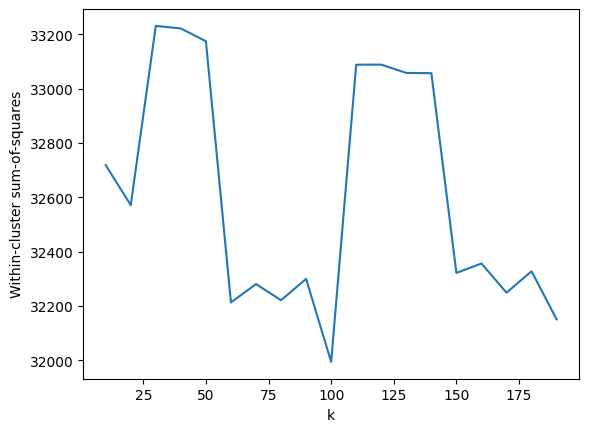

In [ ]:
plt.figure()
plt.plot(k_values, performance_inertia)
plt.ylabel('Within-cluster sum-of-squares')
plt.xlabel('k')
plt.show()

Does it look to you like there is a point on the graph where performance suddenly stops getting a lot better?
- I don't see one ...
- That is likely because we have (i) very high dimensional data and (ii) quite a large number of documents.

So, we can try to analyze the silhouette score in the same range and look into the best scores to find a goof value of k

In [ ]:
from tqdm import tqdm
silhouette_scores = []
for labels in tqdm(performance_labels):
  silhouette_scores.append(metrics.silhouette_score(vector_outputs, labels))

100%|██████████| 19/19 [11:42<00:00, 36.95s/it]


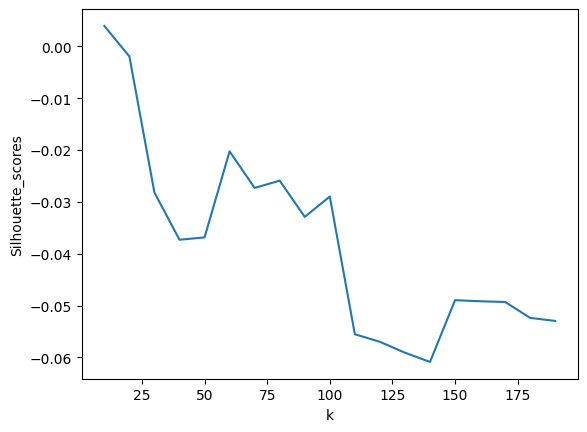

In [ ]:
plt.figure()
plt.plot(k_values, silhouette_scores)
plt.ylabel('Silhouette_scores')
plt.xlabel('k')
plt.show()

In [ ]:
k = k_values[np.argmax(silhouette_scores)]
print(f'The value of K with the highest silhouette_scores is {k}')

The value of K with the highest silhouette_scores is 10


### Clustering with k-Means

Now that we have computed a vector representation, we can perform the clustering.

There are many different clustering algorithms in common use, from k-Means and Hierarchical clustering to DBScan and Spectral clustering.  
- Many of them are implemented in Scikit-learn: https://scikit-learn.org/stable/modules/clustering.html
- You can easily change the code below to try them out.

We will use the k-Means algorithm since it is very popular, fast, scalable and relatively robust.
- k-Means models the dataset using k circlular clusters
- where each cluster is represented by the centroid of the datapoints it contains.

To apply k-Means we need to decide in advance how many clusters to look for.
- We will set the number of clusters to be exactly the number of categories in the dataset to see if the clustering can recover the original groups from the data.

In [ ]:
k = 10

kmeans = KMeans(n_clusters=k, max_iter=100, verbose=True, random_state=2307, n_init=2)
kmeans.fit(vector_outputs)


Initialization complete
Iteration 0, inertia 63516.24591241135.
Iteration 1, inertia 32974.062931478315.
Iteration 2, inertia 32869.14907874812.
Iteration 3, inertia 32820.242830711606.
Iteration 4, inertia 32794.34348283809.
Iteration 5, inertia 32778.79314429635.
Iteration 6, inertia 32768.26663743201.
Iteration 7, inertia 32763.66903940734.
Iteration 8, inertia 32760.029241867014.
Iteration 9, inertia 32756.761068635962.
Iteration 10, inertia 32753.213131701596.
Iteration 11, inertia 32748.42496407015.
Iteration 12, inertia 32743.377122744947.
Iteration 13, inertia 32740.258933356745.
Iteration 14, inertia 32738.340505391072.
Iteration 15, inertia 32737.08974132003.
Iteration 16, inertia 32736.10129014057.
Iteration 17, inertia 32735.445867553317.
Iteration 18, inertia 32734.94523659272.
Iteration 19, inertia 32734.46213456665.
Iteration 20, inertia 32734.089494917607.
Iteration 21, inertia 32733.865106767124.
Iteration 22, inertia 32733.64775741085.
Iteration 23, inertia 32733.4324

KMeans(max_iter=100, n_clusters=10, n_init=2, random_state=2307, verbose=True)

The inertia values are actually the *sum of squared distances between each sample to its closest cluster centroid*
- This is the measure that k-Means seeks to minimise
- Note: It is not the cosine distance between document and the cluster center (which is what we would like to minimise), but given that each vector has length one, the squared Euclidean distance is similar to it.  



### Clustering evaluation

Once we have run our clustering algorithm, we can

#### Investigating the Clusters

The clustering routine has now produced clusters in a very high dimensional feature space (with tens of thousands of dimansions).
- We can't plot such high dimensional data to see whether the clusters look coherent or not.
- Instead we will need to investigate the coherency of the clusters by looking at the terms occuring in them.

We can see the important terms for each cluster by inspecting the centroid vector for the cluster.
- Let's have a look at the terms with high weights in the centroid of the first cluster:

In [ ]:
# Get the centroid for the first cluster
centroid = kmeans.cluster_centers_[0]

# Sort terms according to their weights
# (argsort goes from lowest to highest, we reverse the order through slicing)
sorted_terms = centroid.argsort()[::-1]

# Print out the top 10 terms for the cluster
[vocab[j] for j in sorted_terms[:20]]

['levels',
 'vitamin',
 'deficiency',
 'blood',
 'calcium',
 'iron',
 'hormone',
 'low',
 'serum',
 'increased',
 'body',
 'lead',
 'cause',
 'increase',
 'high',
 'anemia',
 'glucose',
 'decreased',
 'insulin',
 'decrease']

The top 10 terms look pretty consistent.

We could use our dot-product search trick from before to find the document in the collection that is the best exemplar of the cluster:

In [ ]:
index = np.argmax([np.dot(centroid,vec) for vec in vector_outputs.toarray()])

print(documents[index])

What effect does low serum calcium levels have on parathyroid hormone (PTH) levels in the bloodstream? Low serum calcium levels will increase PTH levels in the bloodstream. PTH is a hormone produced by the parathyroid glands that helps regulate calcium levels in the body. When calcium levels in the blood drop too low, the parathyroid glands release more PTH to stimulate the release of calcium from the bones and increase its absorption from the intestines and kidneys. This helps raise blood calcium levels back to normal. However, if low calcium levels persist, it can lead to conditions such as osteoporosis and kidney stones.


We now know what terms were important for defining cluster 0 and have seen a representative document,
- but still don't know how many documents were assigned to to the cluster.
- Let's find out:

In [ ]:
sum(kmeans.labels_ == 0)

1600

We can see which clusters the first 10 documents have been assigned to:

In [ ]:
for i in range(10):
    print(f"document {i} is in cluster {kmeans.labels_[i]}")

document 0 is in cluster 0
document 1 is in cluster 9
document 2 is in cluster 6
document 3 is in cluster 0
document 4 is in cluster 6
document 5 is in cluster 6
document 6 is in cluster 0
document 7 is in cluster 0
document 8 is in cluster 6
document 9 is in cluster 6


Let's now repeat the process (algorithmically) to get the top terms for all the clusters.
- In the code below, we iterate over the clusters, getting the centroid for each, sort the values and printing out the top terms:

In [ ]:
print("Top terms per cluster:")
vocab = vectorizer.get_feature_names_out()

for i in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[i]
    sorted_terms = centroid.argsort()[::-1]
    print(f"Cluster {i}:\t{[vocab[j] for j in sorted_terms[:10]]}")

Top terms per cluster:
Cluster 0:	['levels', 'vitamin', 'deficiency', 'blood', 'calcium', 'iron', 'hormone', 'low', 'serum', 'increased']
Cluster 1:	['cell', 'carcinoma', 'squamous', 'sickle', 'cancer', 'cells', 'tumor', 'type', 'cycle', 'lymphoma']
Cluster 2:	['thyroid', 'hormone', 'gland', 'hyperthyroidism', 'hypothyroidism', 'hormones', 'carcinoma', 'tsh', 'iodine', 'follicular']
Cluster 3:	['cells', 'cancer', 'blood', 'immune', 'type', 'red', 'breast', 'risk', 'cell', 'anemia']
Cluster 4:	['heart', 'blood', 'likely', 'pressure', 'diagnosis', 'patient', 'condition', 'failure', 'cardiac', 'flow']
Cluster 5:	['symptoms', 'treatment', 'infection', 'cause', 'pain', 'condition', 'include', 'complications', 'disease', 'important']
Cluster 6:	['associated', 'patients', 'cause', 'disease', 'typically', 'nerve', 'commonly', 'increased', 'characterized', 'type']
Cluster 7:	['used', 'treat', 'drug', 'class', 'drugs', 'effects', 'medication', 'infections', 'treatment', 'commonly']
Cluster 8:	['

That's interesting.
- It looks like each of the clusters contains relatively consistent terms.

How many documents have been assigned to each cluster?

In [ ]:
print('Number of docs in: ')
number_of_elements = []
for i in range(kmeans.n_clusters):
    n_docs = np.sum(kmeans.labels_ == i)
    print(f"Cluster {i}: {n_docs}")
    number_of_elements.append(n_docs)

Number of docs in: 
Cluster 0: 1600
Cluster 1: 1099
Cluster 2: 330
Cluster 3: 2288
Cluster 4: 1583
Cluster 5: 5183
Cluster 6: 15776
Cluster 7: 2362
Cluster 8: 1780
Cluster 9: 1546


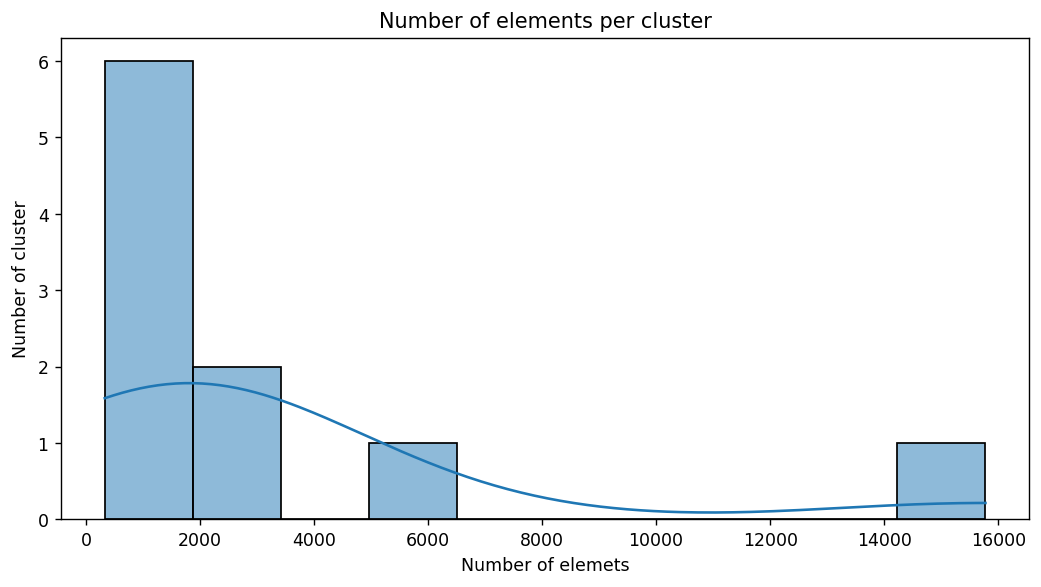

In [ ]:
plt.figure(figsize=(10, 5), dpi=125)
sns.histplot(number_of_elements, bins = k, kde=True)
plt.xlabel('Number of elemets')
plt.ylabel('Number of cluster')
plt.title('Number of elements per cluster')
plt.show()

Looks like there is a very large cluster corresponding to terms that might be more common across the corpus. Mostly, though, the counts are pretty well distributed across the clusters.

#### Quantitative Evaluation of Clustering Results

Let's now move on to the task of quantitatively evaluating the clustering algorithm. There are two ways to evaluate the results of a clustering algorithm:
- **Intrinsic evaluation** - If the ground truth is not known, you could use:
    - Within-cluster sum-of-squares: that is the *inertia* of the K-Means clustering
    - [Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) - "a higher Silhouette Coefficient score relates to a model with better defined clusters"
    
Let's first have a look at the *intrinsic measures*
- print out within-cluster sum-of-squares and the silhouette coefficient:


There are many possible metrics for clustering evaluation: some can be used when the ground truth labels are known, some can be used when the true labels are unknown.



In [ ]:
print("Intrinsic evaluation measures:")
print("Within-cluster sum-of-squares:", str(kmeans.inertia_))
print("Silhouette coefficient:", str(metrics.silhouette_score(vector_outputs, kmeans.labels_)))

Intrinsic evaluation measures:
Within-cluster sum-of-squares: 32732.643366386263
Silhouette coefficient: 0.003886131243916708


The intrinsic evaluation measures are hard to interpret, since their values depend heavily on the difficulty of the clustering task, the amount of data, etc.
- Moreover, the sum-of-squares value will improve monotonically as the number of clusters is increased.


### Minibatch K-means clustering

MiniBatch k-Means is an approximate verions of the k-Means that is designed to scale up to massive datasets by making use of small samples (minibatches) in order to find the k centroids.
- It should be faster to run than k-Means. Let's give it a try:

In [ ]:
mb_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=500, random_state=2307)
mb_kmeans.fit(vector_outputs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=500, n_clusters=10, random_state=2307)

Evaluate the minibatch clustering algorithm to see if the performance compares with the original k-Means on this data:

In [ ]:
print("Intrinsic evaluation measures:")
print("Within-cluster sum-of-squares:", str(mb_kmeans.inertia_))
print("Silhouette coefficient:", str(metrics.silhouette_score(vector_outputs, mb_kmeans.labels_)))

Intrinsic evaluation measures:
Within-cluster sum-of-squares: 32771.46095003698
Silhouette coefficient: 0.0030967807364016752


# Visualisation

Often visualisng the samples and the model output is useful to understand what's going on

### Problems visualising high dimensional data

For a bit of fun, we'll try to transform the high dimensional data into low dimensional data (just 3 dimensions) using a linear dimensionality reduction technique called Singular Value Decomposition.
- We'll transform the `vector_documents` to be 3 dimensional.

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(3)
reduced_data = svd.fit_transform(vector_outputs)

[x,y,z] = np.transpose(reduced_data)
[x,y,z]

[array([0.08529198, 0.04940652, 0.02818806, ..., 0.00959759, 0.03785933,
        0.03623935]),
 array([-0.02632594, -0.00145852,  0.01243214, ..., -0.00138218,
        -0.01954003,  0.0088363 ]),
 array([ 0.15018188,  0.02364082,  0.00871367, ...,  0.00031248,
        -0.02089901, -0.02446853])]

We can plot the data coloured according to the clusters found by the original k-Means algorithm:

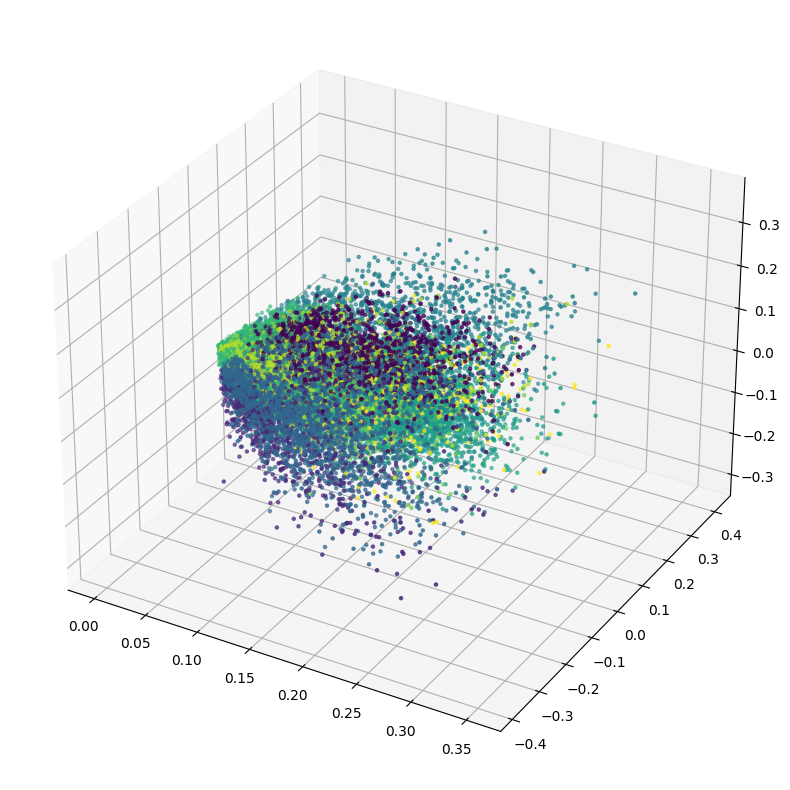

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=kmeans.labels_, marker='.');

# Conclusion from clustering for Answers:

The clustering analysis reveals the main topics within the dataset, with terms consistently associated with specific medical themes, such as **vitamin deficiency**, **cancer types**, **thyroid conditions**, **heart issues**, **symptoms and treatments**, **kidney functions**, and **syndromes**.

Despite the comprehensive clustering, the **silhouette coefficient** is very **low (0.003886)**, indicating that the clusters might not be well-separated and suggesting a need for further refinement or exploration of other clustering techniques to achieve better-defined groupings.

The distribution of documents across clusters highlights varying concentrations, with some clusters (e.g., Cluster 6) containing significantly more documents than others, suggesting prevalent themes within the dataset.

**Term Frequency-Inverse Document Frequency (TF-IDF) Analysis:**
We analyzed the TF-IDF scores for terms within the clusters to identify the most significant terms. For example, terms such as **"levels"** and **"vitamin"** in **Cluster 0** have high TF-IDF scores, indicating their importance in the documents within that cluster. This approach helped us in understanding the key topics and terms that are characteristic of each cluster.

**Cluster Composition and Overlap:**
The cluster composition reveals that certain medical themes dominate the dataset. **Cluster 6**, with the highest number of documents **(15776)**, suggests a predominant focus on patient-related discussions and common diseases. On the other hand, clusters like **Cluster 2** (**330 documents**) focus on more specialized topics such as **thyroid conditions**, indicating less frequent but highly specific content.

**Evaluating Optimal Number of Clusters (k):**
We conducted an evaluation of MiniBatch K-Means clustering over a range of cluster numbers (k) from 10 to 190. The within-cluster sum-of-squares (inertia) decreases as k increases, but the silhouette coefficient remains low throughout. This suggests that while increasing the number of clusters might slightly improve cohesion within clusters, it does not necessarily enhance separation between them.

**Computational Performance:**
The computational performance analysis of MiniBatch K-Means clustering showed varying execution times with different values of k. The execution time generally increases with the number of clusters, reflecting the higher computational complexity. For example, k=10 took 0.44s, whereas k=190 took 17.44s. This information is crucial for optimizing the trade-off between clustering accuracy and computational efficiency.

#Context

#Clustering with contexts

In this section we have used the datasets which we generated using our context retrieval algorithm as the hugging face dataset did not have the context.

In [17]:
file_dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/NLP Project/Datasets/questions_context_dataframe.csv')
print(type(file_dataframe))

<class 'pandas.core.frame.DataFrame'>


In [18]:
file_dataframe.head()

question  length  \
0  What is the relationship between very low Mg2+...      14   
1  What leads to genitourinary syndrome of menopa...       9   
2  What does low REM sleep latency and experienci...      11   
3  What are some possible causes of low PTH and h...      12   
4  How does the level of anti-müllerian hormone r...      11   

                                       noPunctuation  \
0  ['what', 'is', 'the', 'relationship', 'between...   
1  ['what', 'leads', 'to', 'genitourinary', 'synd...   
2  ['what', 'does', 'low', 'rem', 'sleep', 'laten...   
3  ['what', 'are', 'some', 'possible', 'causes', ...   
4  ['how', 'does', 'the', 'level', 'of', 'antimül...   

                                         noStopWords  \
0  ['relationship', 'low', 'mg2', 'levels', 'pth'...   
1  ['leads', 'genitourinary', 'syndrome', 'menopa...   
2  ['low', 'rem', 'sleep', 'latency', 'experienci...   
3  ['possible', 'causes', 'low', 'pth', 'high', '...   
4  ['level', 'antimüllerian', 'hormone', 'relate'...   

                                          lemmatized  \
0  ['what', 'is', 'the', 'relationship', 'between...   
1  ['what', 'lead', 'to', 'genitourinary', 'syndr...   
2  ['what', 'doe', 'low', 'rem', 'sleep', 'latenc...   
3  ['what', 'are', 'some', 'possible', 'cause', '...   
4  ['how', 'doe', 'the', 'level', 'of', 'antimüll...   

                              noStopWords-lemmatized  \
0  ['relationship', 'low', 'mg2', 'level', 'pth',...   
1  ['lead', 'genitourinary', 'syndrome', 'menopau...   
2  ['low', 'rem', 'sleep', 'latency', 'experienci...   
3  ['possible', 'cause', 'low', 'pth', 'high', 'c...   
4  ['level', 'antimüllerian', 'hormone', 'relate'...   

                                            keywords  \
0                             ca2 pth mg2 levels low   
1  menopause genitourinary vaginitis syndrome atr...   
2         hallucinations sleep paralysis latency rem   
3                        calcium pth causes high low   
4            ovarian hormone müllerian reserve level   

                                            contexts  
0  Reduced extracellular Ca2+ is known to promote...  
1  The Postmenopausal Vaginal Microbiome and Geni...  
2  Narcolepsy type 1 is a disabling disorder with...  
3  A 32-year-old lady with a history of bulimia n...  
4  Anti-Mullerian hormone is a robust marker of o...

In [19]:
contexts = file_dataframe["contexts"]

##Context vectorization

We processesed a set of text contexts by first converting them into TF-IDF vectors using TfidfVectorizer.

Then, we evaluated the optimal number of clusters for K-Means clustering by iterating over different k values.

Futhermore, we computed the inertia (within-cluster sum-of-squares) and silhouette scores for each k value, aiding in the assessment of cluster quality.

Finally, we identified the k value with the highest silhouette score as the optimal number of clusters for the given text data.

In [20]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english', )

In [21]:
vectorizer.fit(contexts)

TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

In [22]:
vocab = vectorizer.get_feature_names_out()

print(f"Length of vocabulary: {len(vocab)}")

Length of vocabulary: 26451


It's a lot bigger than using only the answers

In [23]:
vector_contexts = vectorizer.transform(contexts)

In [24]:
sorted([(vocab[j], vector_contexts[0, j]) for j in vector_contexts[0].nonzero()[1]], key=lambda x: -x[1])

[('ca2', 0.5055627298399121),
 ('mg2', 0.48886021874297336),
 ('pth', 0.27283811070306985),
 ('adenylate', 0.2338648744042026),
 ('cyclase', 0.21392904643208116),
 ('mm', 0.21291059145623448),
 ('secretion', 0.19886797920387445),
 ('gpp', 0.17023411602821137),
 ('concentration', 0.1581290533517575),
 ('nh', 0.14665806562289202),
 ('parathyroid', 0.108453067290898),
 ('repletion', 0.1043604980888794),
 ('stimulated', 0.10212729627131056),
 ('membranes', 0.10150080814581963),
 ('guanine', 0.09354594976168103),
 ('inhibition', 0.08200624034980264),
 ('camp', 0.07886854136016465),
 ('maximal', 0.07535159959904732),
 ('promote', 0.06859800354827948),
 ('presence', 0.06669927995599156),
 ('rat', 0.06186615380494325),
 ('enzyme', 0.05326843040898242),
 ('decrease', 0.05274184017126062),
 ('maximally', 0.051430647059034586),
 ('edta', 0.050764516799448434),
 ('yl', 0.04912091470100998),
 ('metals', 0.04912091470100998),
 ('broken', 0.04745817840297681),
 ('gtp', 0.046772974880840514),
 ('assay

We can try to compare the top words of the first context with the question and the answer to see if they are relevant

In [25]:
print("Input: ", input[0], "\n")
print("Output: ", output[0], "\n")
print("Context: ", contexts[0])

Input:  What is the relationship between very low Mg2+ levels, PTH levels, and Ca2+ levels? 

Output:  Very low Mg2+ levels correspond to low PTH levels which in turn results in low Ca2+ levels. 

Context:  Reduced extracellular Ca2+ is known to promote PTH secretion, while severe Mg2+ 
depletion has the opposite effect. We have correlated the effects of Mg2+ and 
Ca2+ on parathyroid hormone (PTH) secretion and cAMP accumulation by rat 
parathyroid tissues in vitro with the effects of these two metals on adenylate 
cyclase activity in broken membrane preparations. PTH secretion was maximal at 
0.5 mM Ca2+, falling to low levels as the Ca2+ concentration was increased to 
2.5 mM. Deletion of Mg2+ from the medium resulted in a marked decrease in PTH 
secretion at any given Ca2+ concentration. At a constant Ca2+ concentration of 1 
mM, both PTH secretion and cAMP production rose to maximal rates as the Mg2+ 
concentration was increased from 0 to 2 mM. The adenylate cyclase of rat 
parathy

Mg2, Ca2 and PTH are stricly connected with both the answer and the question

##Selecting a value of k

We evaluated the performance of MiniBatch K-Means clustering over a range of cluster numbers (k) from 10 to 190.

Futhermore, we measured and printed the inertia and execution time for each value of k and estimate the remaining time for the evaluations.

Finally, stored the results for further analysis to determine the optimal number of clusters.

In [26]:
if True:
  performance_inertia = []
  performance_labels = []
  sum_time = 0
  k_values = range(10,200, 10)
  for k in k_values:
    print(f'Evaluation with k={k}')
    start =time.time()
    mini_batch = MiniBatchKMeans(n_clusters=k, batch_size=500, random_state=2307, n_init=2).fit(vector_contexts)
    end = time.time()
    execution_time = round(end-start, 2)
    sum_time += execution_time
    i = k_values.index(k)+1
    estimated_remaining_time = round((sum_time/i)*(len(k_values)-i), 2)
    performance_inertia.append(mini_batch.inertia_)
    performance_labels.append(mini_batch.labels_)
    print(f'Inertia:{mini_batch.inertia_}\nExecution time:{execution_time}s\nEstimated remaining time:{estimated_remaining_time}s\n\n')

Evaluation with k=10
Inertia:32788.764449994
Execution time:0.77s
Estimated remaining time:13.86s


Evaluation with k=20
Inertia:32607.472527703685
Execution time:1.35s
Estimated remaining time:18.02s


Evaluation with k=30
Inertia:32534.901935455342
Execution time:3.62s
Estimated remaining time:30.61s


Evaluation with k=40
Inertia:32538.308897209543
Execution time:7.59s
Estimated remaining time:49.99s


Evaluation with k=50
Inertia:32702.81043831083
Execution time:3.58s
Estimated remaining time:47.35s


Evaluation with k=60
Inertia:32328.40868717479
Execution time:4.03s
Estimated remaining time:45.37s


Evaluation with k=70
Inertia:32432.48901665106
Execution time:8.67s
Estimated remaining time:50.76s


Evaluation with k=80
Inertia:32481.895252399707
Execution time:5.64s
Estimated remaining time:48.47s


Evaluation with k=90
Inertia:32765.764421358454
Execution time:10.52s
Estimated remaining time:50.86s


Evaluation with k=100
Inertia:32411.782457881658
Execution time:10.3s
Estimate

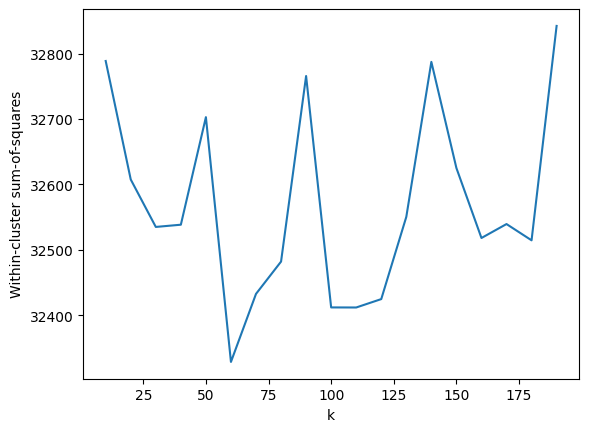

In [27]:
plt.figure()
plt.plot(k_values, performance_inertia)
plt.ylabel('Within-cluster sum-of-squares')
plt.xlabel('k')
plt.show()

From the graph it is impossible to understand the right value of k so we calculate the silhouette scores for the same k values

In [28]:
from tqdm import tqdm
silhouette_scores = []
for labels in tqdm(performance_labels):
  silhouette_scores.append(metrics.silhouette_score(vector_contexts, labels))

100%|██████████| 19/19 [16:16<00:00, 51.40s/it]


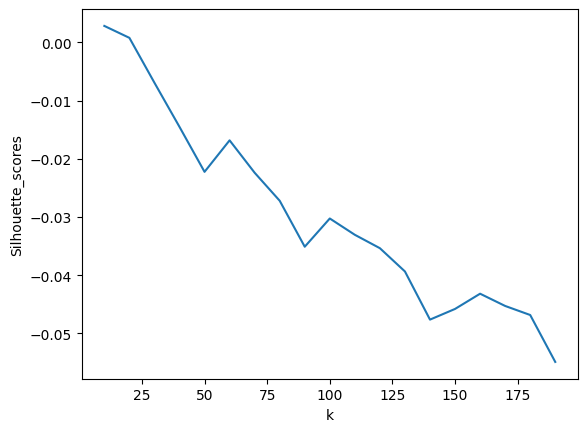

In [29]:
plt.figure()
plt.plot(k_values, silhouette_scores)
plt.ylabel('Silhouette_scores')
plt.xlabel('k')
plt.show()

In [30]:
k = k_values[np.argmax(silhouette_scores)]
print(f'The value of K with the highest silhouette_scores is {k}')

The value of K with the highest silhouette_scores is 10


##K-means clustering

We performed K-Means clustering to group similar text documents together. Here's what we learned from this analysis:

**Cluster Themes:** We identified 10 distinct groups (clusters) of text documents. Each cluster has a set of keywords that best represent the common themes or topics found within the documents in that group.

**Understanding Each Group:** We can see the top 10 most important words for each cluster. This helped us understand the core ideas that define each group of documents.

**Finding Representative Documents:** We found a document that closely resembles the central point (centroid) of the first cluster. This document served as a good example of the typical text found within that cluster.

**Distribution of Documents:** We explored how many documents belong to each cluster. We then visualized this distribution using a histogram. This helps us see how many documents fall into each group size category.

**Cluster Quality Check:** We performed some calculations to assess the quality of the clustering. These calculations tell us how tightly documents within each group resemble each other.

In short, this analysis helped us understand how the text documents can be grouped based on their content. We can see the key themes for each group, how many documents fall into each group, and how well the documents within each group are clustered together.

In [31]:
k = 10

kmeans = KMeans(n_clusters=k, max_iter=100, verbose=True, random_state=2307, n_init=2)
kmeans.fit(vector_contexts)

Initialization complete
Iteration 0, inertia 63821.95605370491.
Iteration 1, inertia 32951.33855370684.
Iteration 2, inertia 32887.44977251749.
Iteration 3, inertia 32855.55648763981.
Iteration 4, inertia 32831.427793859606.
Iteration 5, inertia 32812.5312423155.
Iteration 6, inertia 32802.54379095395.
Iteration 7, inertia 32798.83957392853.
Iteration 8, inertia 32796.84089578173.
Iteration 9, inertia 32795.39346731924.
Iteration 10, inertia 32794.07382164021.
Iteration 11, inertia 32792.630821696424.
Iteration 12, inertia 32791.34732732756.
Iteration 13, inertia 32789.745668030446.
Iteration 14, inertia 32788.16852373995.
Iteration 15, inertia 32786.712070277295.
Iteration 16, inertia 32785.12405366023.
Iteration 17, inertia 32783.08980984668.
Iteration 18, inertia 32781.19069437412.
Iteration 19, inertia 32779.65228623867.
Iteration 20, inertia 32778.03803195854.
Iteration 21, inertia 32775.74981304024.
Iteration 22, inertia 32772.625168265775.
Iteration 23, inertia 32770.31341081748

KMeans(max_iter=100, n_clusters=10, n_init=2, random_state=2307, verbose=True)

In [32]:
# Get the centroid for the first cluster
centroid = kmeans.cluster_centers_[0]

# Sort terms according to their weights
# (argsort goes from lowest to highest, we reverse the order through slicing)
sorted_terms = centroid.argsort()[::-1]

# Print out the top 10 terms for the cluster
[vocab[j] for j in sorted_terms[:20]]

['virus',
 'hiv',
 'infection',
 'viral',
 'hepatitis',
 'hbv',
 'viruses',
 'hsv',
 'herpes',
 'infected',
 'patients',
 'infections',
 'human',
 'rna',
 'hcv',
 'simplex',
 'replication',
 'dna',
 'cmv',
 'influenza']

In [33]:
index = np.argmax([np.dot(centroid,vec) for vec in vector_contexts.toarray()])

print(contexts[index])

Hepatitis B virus replication in diverse cell types during chronic hepatitis B 
virus infection.


In [34]:
print("Top terms per cluster:")
vocab = vectorizer.get_feature_names_out()

for i in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[i]
    sorted_terms = centroid.argsort()[::-1]
    print(f"Cluster {i}:\t{[vocab[j] for j in sorted_terms[:10]]}")

Top terms per cluster:
Cluster 0:	['virus', 'hiv', 'infection', 'viral', 'hepatitis', 'hbv', 'viruses', 'hsv', 'herpes', 'infected']
Cluster 1:	['case', 'patient', 'report', 'old', 'year', 'rare', 'diagnosis', 'symptoms', 'presented', 'disease']
Cluster 2:	['syndrome', 'case', 'patients', 'report', 'associated', 'diagnosis', 'clinical', 'patient', 'rare', 'treatment']
Cluster 3:	['nerve', 'study', 'acid', 'activity', 'blood', 'type', 'protein', 'effects', 'human', 'effect']
Cluster 4:	['treatment', 'disease', 'patients', 'clinical', 'therapy', 'drugs', 'drug', 'review', 'use', 'symptoms']
Cluster 5:	['cancer', 'breast', 'risk', 'lung', 'patients', 'tumor', 'hpv', 'prostate', 'carcinoma', 'women']
Cluster 6:	['pulmonary', 'lung', 'respiratory', 'embolism', 'patients', 'pressure', 'disease', 'ventilation', 'volume', 'hypertension']
Cluster 7:	['patients', 'study', 'group', 'risk', 'age', 'results', '95', 'years', 'ci', 'women']
Cluster 8:	['heart', 'cardiac', 'aortic', 'ventricular', 'le

In [35]:
print('Number of docs in: ')
number_of_elements = []
for i in range(kmeans.n_clusters):
    n_docs = np.sum(kmeans.labels_ == i)
    print(f"Cluster {i}: {n_docs}")
    number_of_elements.append(n_docs)

Number of docs in: 
Cluster 0: 1142
Cluster 1: 3821
Cluster 2: 1376
Cluster 3: 12542
Cluster 4: 4679
Cluster 5: 917
Cluster 6: 742
Cluster 7: 4481
Cluster 8: 1196
Cluster 9: 2651


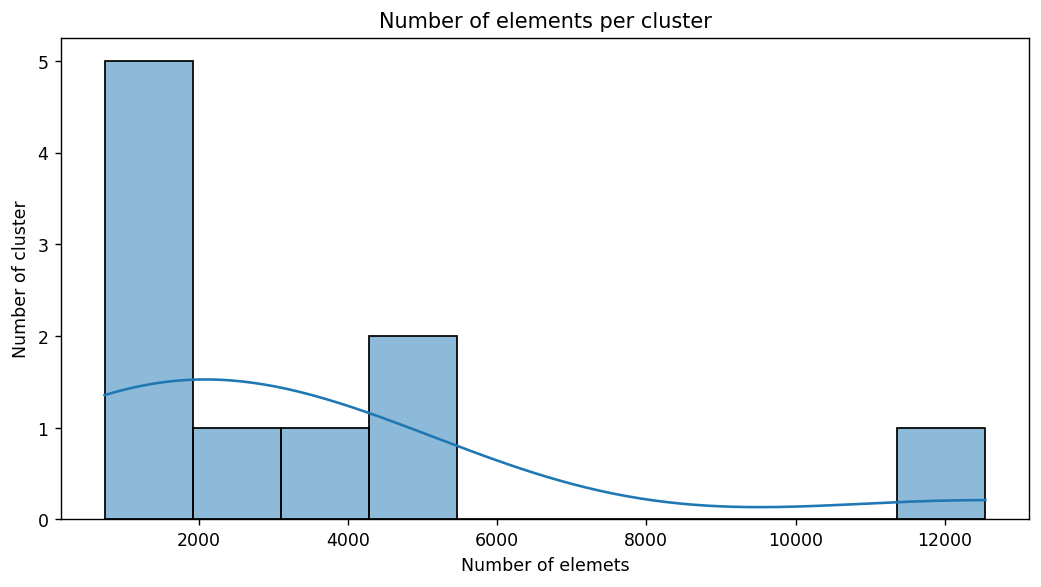

In [36]:
plt.figure(figsize=(10, 5), dpi=125)
sns.histplot(number_of_elements, bins = k, kde=True)
plt.xlabel('Number of elemets')
plt.ylabel('Number of cluster')
plt.title('Number of elements per cluster')
plt.show()

In [37]:
print("Intrinsic evaluation measures:")
print("Within-cluster sum-of-squares:", str(kmeans.inertia_))
print("Silhouette coefficient:", str(metrics.silhouette_score(vector_contexts, kmeans.labels_)))

Intrinsic evaluation measures:
Within-cluster sum-of-squares: 32764.72894424961
Silhouette coefficient: 0.0029566628146884964


# Conclusion from clustering for context:

Our clustering analysis reveals distinct themes in the dataset, including viral infections, case reports, syndromes, biological studies, treatments, cancer research, pulmonary diseases, epidemiological studies, cardiac conditions, and cellular biology.

The largest clusters are focused on biological studies and treatments, indicating a significant emphasis in these areas.


**Cluster Size Distribution:**



*   **Observation:** Cluster sizes vary significantly, with the largest cluster (Cluster 3) containing 12,542 documents and the smallest (Cluster 6) containing 742 documents.
*   **Implication:** This suggests that some topics are much more prevalent in the dataset. For instance, biological studies and treatments are heavily represented, indicating these are major areas of focus or interest in the dataset.

**Dominant Themes:**



*   **Clusters with Common Themes:** Multiple clusters (e.g., Clusters 1, 2, and 4) relate to patient care and treatment, though they differ in focus (case reports, clinical syndromes, and therapies).
*   **Implication:** There's a strong emphasis on clinical aspects of medicine, showing a potential overlap in topics, which might suggest a need for more granular clustering.

**Term Overlap:**

*   **Observation:** Some terms like "patients" and "case" appear in multiple clusters, indicating common topics across different clusters.
*   **Implication:** The dataset might benefit from a hierarchical clustering approach to better differentiate between overlapping themes.


**Intrinsic Evaluation Measures:**


*   **Within-cluster sum-of-squares (Inertia):** 32764.73
*   **Silhouette Coefficient:** 0.00296


The high inertia value suggests some clusters are not very compact, and the low silhouette coefficient indicates that the clusters are not well-separated.
This could be because we have a closed-domain dataset (medical one) covering a wide range of highly specilized topics.  To achieve a high level of internal cohesion within each cluster, we would need a large number of clusters, ensuring that each cluster contrains only closely related elements.


